# Основы программирования в Python

*Семинар по классификации, Максим Першин*

## Правила игры и организационные моменты

* В ходе курса мы выдадим несколько домашних заданий. Каждое задание будет представлять собой набор данных и тетрадку наподобие этой, в которой вам самим нужно будет выполнить некоторые задания. Тетрадка с решениями должна быть исполняемой, то есть, если запустить все ячейки от начала до конца, ошибок (из-за которых исполнение остановится) быть не должно.
  + Задачи, для решения которых предоставлен неработающий код (код, который невозможно запустить из-за наличия грубых ошибок/опечаток), не засчитываются, даже если при этом зафиксирован верный результат.
  + Если при проверке работ установлен факт нарушения академической этики, студент получает оценку «0» за данную работу. Работа студента, предоставившего свою работу для списывания, также аннулируется.


## Самостоятельный поиск информации

Не у всех задач, которые вам встретятся, есть готовые решения и, тем более, не ко всем вас будут детально готовить. В течение курса вам придется искать много информации самостоятельно — это один из ключевых навыков любой современной профессии. Чтобы искать эффективно, не набирайте в поиске просто формулировку задачи. Подумайте, какое **конкретное** действие вам нужно сделать и какого именно знания вам для этого не хватает, и сформулируйте этот запрос. Лучше всего писать запрос сразу **на английском** — глобальное сообщество программистов и аналитиков (да и в любой другой области) **гораздо** шире, чем русскоязычное.

**Пример:** Допустим, вам нужно, как в семинаре, показать студентов с оценкой по английскому выше 7 и по мат. анализу выше 6. Вы помните, как выбирать строки по условию, но не представляете, что делать, если условий несколько.

*Очень плохой запрос:* «Сколько студентов имеют выше 7 по английскому языку и выше 6 по мат. анализу python»

*Плохой запрос:* «pandas выбрать строки по нескольким условиям»

*Хороший запрос:* «pandas select rows by multiple conditions»

По хорошему запросу ответ находится с первой ссылки. Запрос на русском плохой, потому что первые результаты в этом случае — машинные переводы вопросов со StackOverflow, а не оригинальный русскоязычный контент.

### Полезные ссылки

* https://google.com/
* https://stackoverflow.com/

Если у вас не получилось найти гайд/туториал/разбор вашего вопроса, это не повод отчаиваться. Ответ может прятаться в документации к библиотеке. Читать документацию совсем не страшно, и там тоже бывают очень подробные примеры.

* https://docs.python.org/3/
* https://pandas.pydata.org/pandas-docs/stable/
* https://docs.scipy.org/doc/numpy/reference/
* https://matplotlib.org/contents.html
* http://scikit-learn.org/stable/documentation.html

---

## Линейные методы классификации. Решающие деревья. Оценка качества моделей. 

Для работы нам понадобятся некоторые библиотеки: 
* `pandas` — библиотека для удобной работы с таблицами;
* `NumPy` — библиотека для работы с массивами;
* `scikit-learn` — библиотека, которая содержит реализации множества алгоритмов машинного обучения;
* `matplotlib` — библиотека для построения графиков.

In [405]:
import pandas as pd

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn import metrics

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Отличие задачи классификации от задачи регрессии:

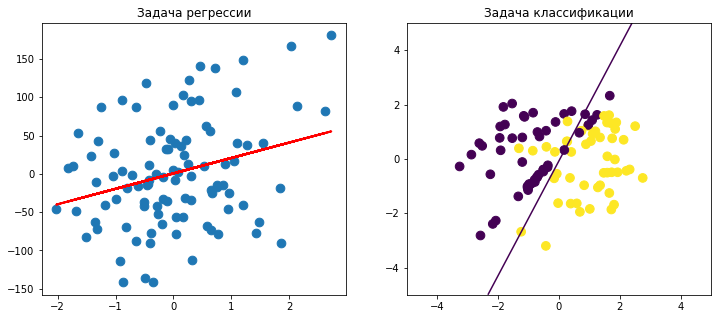

In [406]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.title("Задача регрессии")
X1, Y1 = make_regression(n_samples=100, n_features=2)
plt.scatter(X1[:, 0], Y1, marker='o', s=75)

model_reg = LinearRegression().fit(X1[:, 0].reshape(-1, 1), Y1)
y_pred = model_reg.predict(X1[:, 0].reshape(-1, 1))
plt.plot(X1[:, 0], y_pred, color='red', linewidth=2)

plt.subplot(122)
plt.title("Задача классификации")
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=75)

model_clf = LogisticRegression().fit(X1, Y1)
xx = np.linspace(-5, 5, 2)
yy = np.linspace(-5, 5, 2)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_clf.decision_function(xy).reshape(XX.shape)
plt.gca().contour(XX, YY, Z, levels=[0])

plt.show()

<h3>Примеры задач, котрые решаются при помощи классификации:</h3>
<ul>
<li> Кредитный скоринг
<li> Фильтрация спама
<li> Оценка принадлежности страны равитым или развивающимся странам
<li> Медицинская диагностика
<li> Определение вида объекта на картинке
<li> Предсказание погоды
<li> И многое другое
</ul>

**Почему для классификации нельзя использовать обычную линейную регрессию?**

### Данные для задачи классификации:

Рассмотрим пример задачи классификации на примере очень популярного датасета: https://www.kaggle.com/c/titanic. Мы хотим построить модель, которая бы корректно предсказывала выживаемость пассажира при крушении в зависимости от известных о нем данных.

* `PassengerId` – id пассажира (int32)
* `Survived` – выжил ли пассажир (bool) {1-да, 0-нет}
* `Name` – имя пассижира (str) 
* `Pclass` – класс каюты (int32)
* `Sex` – пол пассажира (int32)  	
* `Age` – возраст	
* `Sibsp` – кол-во братьев/систер и супргов/жен на борту (int32)
* `Parch` – кол-во родителей/детей на борту (int32)
* `Ticket` – номер билета (int32)
* `Fare` – стоимость билета (float32)
* `Cabin` – номер каюты (str)	
* `Embarked` – порт посадки (str) {C - Cherbourg, S - Southampton, Q - Queenstown}

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Проверим наличие пропусков:

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

Далее мы заполним пропуски в `Age` при помощи линейной регрессии. Почему сначала нужно разбить данные на `test` и `train`, а уже потом заполнять пропуски регрессией отдельно? Почему нельзя использовать целевой признак как фичу для линейной регрессии?

Пока номер билета нам ничего не дает. Давайте попробуем преобразовать его в какой-то осмысленный признак: возьмем из него первую букву, хоть мы и не знаем, что она означает (будем надеяться, что это этаж или класс каюты).

К сожалению, преобразования имени пассажира и номера билета в осмысленные признаки слишком тяжелая задача и не факт, что это принесет нам пользу. Поэтому мы удалим даные признаки из выборки. Какие у вас есть идеи по поводу того как можно преобразовать имя и номера билета в признаки?

Преобразуем текстовые признаки Cabin, Sex и Embarked. Заметим, что пропуски были заменены на 0, то есть на отсутствие класса.

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,
887,0,2,27.0,0,0,13.00,1,0,0,0,0,0,0,0,0,0,0,1
888,1,1,19.0,0,0,30.00,0,0,1,0,0,0,0,0,0,0,0,1
889,0,3,NaN,1,2,23.45,0,0,0,0,0,0,0,0,0,0,0,1
890,1,1,26.0,0,0,30.00,1,0,0,1,0,0,0,0,0,1,0,0
891,0,3,32.0,0,0,7.75,1,0,0,0,0,0,0,0,0,0,1,0


Почему наличие пропусков в задаче классификации не так важно, как в задаче регрессии?

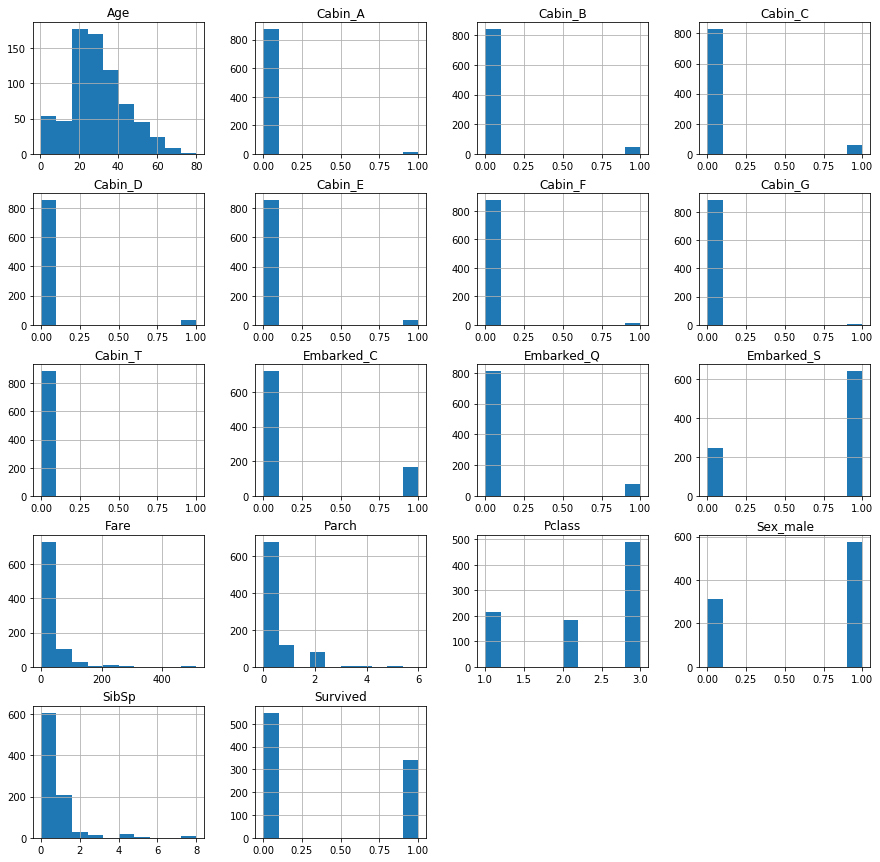

Как и на прошлом семинаре, для того чтобы у нас была возможность проверить модели, выборку нужно разбить на `train` и `test`. На `train` мы будем обучать модели, а на `test` проверять качество работы алгоритмов.

Заполнияем пропуски регрессией для `X_train`:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Заполнияем пропуски регрессией для `X_test`:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Метрики качества

<img src='http://fgiasson.com/blog/wp-content/uploads/2016/10/confusion-matrix-wikipedia.png' width="1000">

Все стандартные способы оценки качества классификации доступны в библиотеке sklearn.

<img src='https://raw.githubusercontent.com/Skvidvardin/Fun/master/image_2019-06-03_22-47-39.png' width="700">

### Логистическая регрессия

$$P(y = 1\ |\ X, \vec{w}) = \frac{1}{1 + exp(-\vec{w}^TX)}$$.

Задача состоит в том, что максимизировать следующую функцию:

$$\sum_{i=1}^{n}log(P(y_{i}\ |\ \vec{x}_i, \vec{w})) - C\times|\vec{w}^{2}|_{j}, \textsf{где С-коэффициент регуляризации, j-вид нормы}$$ 

Обучим стандартную логистическую регрессию (заметим, что логистическая регрессия "из коробки" использует регуляризацию):

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Построим ROC-кривую:

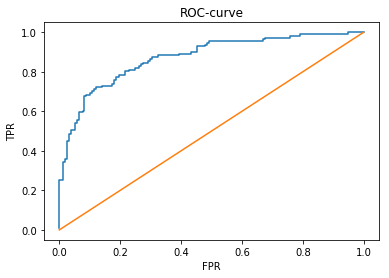

Как изменится ROC-кривая, если мы "завысим" коэффициент и изменим l2-норму на l1? Почему так получается?

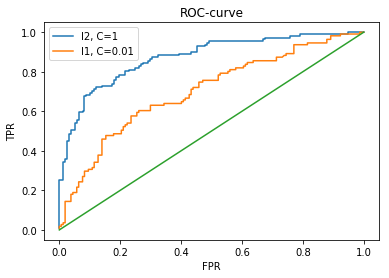

Упало или улучшилось качество классификации? почему так произошло?

### Деревья решений

<img src='https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png' width="300">

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

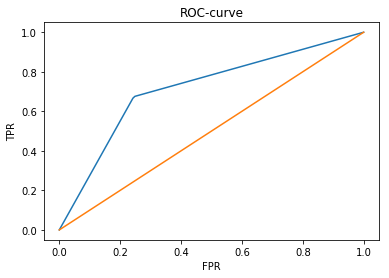

Как и логистической регрессии, есть способы регуляризации дерева:
* Максимальная глубина дерева
* Минимальное кол-во элементов в листе
* Максимально кол-во листов
* Минимальное увеличения критерия информативности

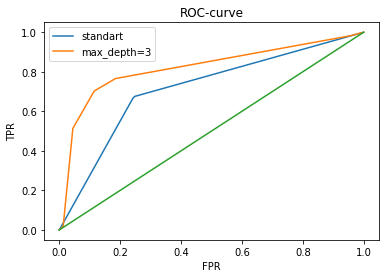

### Случайный лес

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

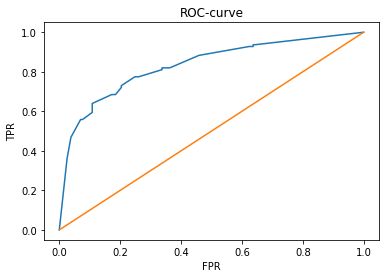

Способы регуляризации случайного леса:
* Кол-во деревьев
* Кол-во фичей для каждого дерева
* Максимальная глубина дерева
* Минимальное кол-во элементов в листе
* Максимально кол-во листов
* Минимальное увеличения критерия информативности

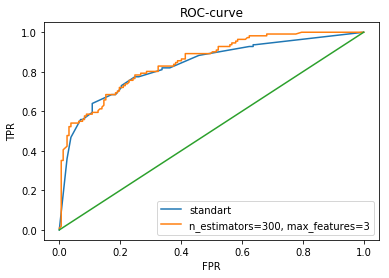